In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel(r"Dataset.xlsx")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           20000 non-null  int64         
 1   product_id               20000 non-null  int64         
 2   customer_id              20000 non-null  int64         
 3   transaction_date         20000 non-null  datetime64[ns]
 4   online_order             19640 non-null  float64       
 5   order_status             20000 non-null  object        
 6   brand                    19803 non-null  object        
 7   product_line             19803 non-null  object        
 8   product_class            19803 non-null  object        
 9   product_size             19803 non-null  object        
 10  list_price               20000 non-null  float64       
 11  standard_cost            19803 non-null  float64       
 12  product_first_sold_date  19803 n

In [3]:
# Delete cancelled orders
df = df[df['order_status'] == 'Approved']
df

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,19996,51,1018,2017-06-24,1.0,Approved,OHM Cycles,Standard,high,medium,2005.66,1203.40,37823.0
19996,19997,41,127,2017-11-09,1.0,Approved,Solex,Road,medium,medium,416.98,312.74,35560.0
19997,19998,87,2284,2017-04-14,1.0,Approved,OHM Cycles,Standard,medium,medium,1636.90,44.71,40410.0
19998,19999,6,2764,2017-07-03,0.0,Approved,OHM Cycles,Standard,high,medium,227.88,136.73,38216.0


In [4]:
# Create 'cohort_month' and 'cohort_index' columns
df['cohort_month'] = df.groupby('customer_id')['transaction_date'].transform('min').dt.to_period('M')

df['transaction_month'] = df['transaction_date'].dt.to_period('M')

df['cohort_index'] = (df['transaction_month'].dt.month - df['cohort_month'].dt.month) + 1
df

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,cohort_month,transaction_month,cohort_index
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0,2017-02,2017-02,1
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0,2017-01,2017-05,5
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0,2017-01,2017-10,10
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0,2017-02,2017-08,7
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0,2017-01,2017-10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,19996,51,1018,2017-06-24,1.0,Approved,OHM Cycles,Standard,high,medium,2005.66,1203.40,37823.0,2017-01,2017-06,6
19996,19997,41,127,2017-11-09,1.0,Approved,Solex,Road,medium,medium,416.98,312.74,35560.0,2017-01,2017-11,11
19997,19998,87,2284,2017-04-14,1.0,Approved,OHM Cycles,Standard,medium,medium,1636.90,44.71,40410.0,2017-04,2017-04,1
19998,19999,6,2764,2017-07-03,0.0,Approved,OHM Cycles,Standard,high,medium,227.88,136.73,38216.0,2017-02,2017-07,6


In [5]:
# Count number of customer for each cohort month and corhort index
cohort_data = df.groupby(['cohort_month', 'cohort_index']).agg({'customer_id': 'nunique'}).reset_index()
cohort_data.rename(columns={'customer_id': 'num_customers'}, inplace=True)

cohort_data

,cohort_month,cohort_index,num_customers
0,2017-01,1,1347
1,2017-01,2,483
2,2017-01,3,505
3,2017-01,4,499
4,2017-01,5,492
...,...,...,...
73,2017-10,2,6
74,2017-10,3,8
75,2017-11,1,13
76,2017-11,2,5


In [6]:
# Create pivot table
cohort_pivot = cohort_data.pivot(index='cohort_month', columns='cohort_index', values='num_customers')

cohort_pivot

cohort_index,1,2,3,4,5,6,7,8,9,10,11,12
cohort_month,,,,,,,,,,,,
2017-01,1347.0,483.0,505.0,499.0,492.0,475.0,513.0,524.0,489.0,524.0,492.0,510.0
2017-02,800.0,322.0,297.0,311.0,283.0,297.0,306.0,281.0,325.0,306.0,292.0,NaN
2017-03,484.0,167.0,172.0,164.0,180.0,184.0,173.0,209.0,186.0,180.0,NaN,NaN
2017-04,337.0,110.0,121.0,152.0,142.0,118.0,144.0,125.0,129.0,NaN,NaN,NaN
2017-05,213.0,86.0,83.0,88.0,73.0,73.0,74.0,83.0,NaN,NaN,NaN,NaN
2017-06,123.0,45.0,44.0,47.0,45.0,45.0,54.0,NaN,NaN,NaN,NaN,NaN
2017-07,77.0,26.0,26.0,32.0,37.0,24.0,NaN,NaN,NaN,NaN,NaN,NaN
2017-08,51.0,18.0,22.0,18.0,13.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-09,24.0,8.0,7.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# Calculate Retention Rate
cohort_size = cohort_pivot.iloc[:, 0]
retention_rate = (cohort_pivot.divide(cohort_size, axis=0) *100).round(1)

retention_rate

cohort_index,1,2,3,4,5,6,7,8,9,10,11,12
cohort_month,,,,,,,,,,,,
2017-01,100.0,35.9,37.5,37.0,36.5,35.3,38.1,38.9,36.3,38.9,36.5,37.9
2017-02,100.0,40.2,37.1,38.9,35.4,37.1,38.2,35.1,40.6,38.2,36.5,NaN
2017-03,100.0,34.5,35.5,33.9,37.2,38.0,35.7,43.2,38.4,37.2,NaN,NaN
2017-04,100.0,32.6,35.9,45.1,42.1,35.0,42.7,37.1,38.3,NaN,NaN,NaN
2017-05,100.0,40.4,39.0,41.3,34.3,34.3,34.7,39.0,NaN,NaN,NaN,NaN
2017-06,100.0,36.6,35.8,38.2,36.6,36.6,43.9,NaN,NaN,NaN,NaN,NaN
2017-07,100.0,33.8,33.8,41.6,48.1,31.2,NaN,NaN,NaN,NaN,NaN,NaN
2017-08,100.0,35.3,43.1,35.3,25.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-09,100.0,33.3,29.2,37.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Visualizations

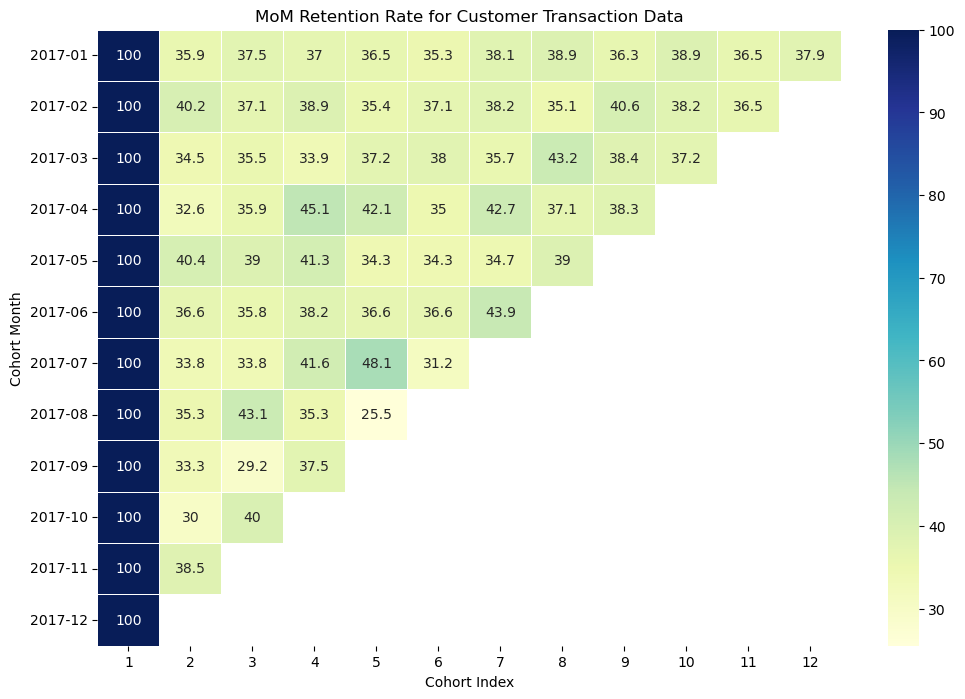

In [8]:
# Retention Rate Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(retention_rate, annot=True, cmap='YlGnBu', fmt='g', linewidths=.5)
plt.title('MoM Retention Rate for Customer Transaction Data')
plt.xlabel('Cohort Index')
plt.ylabel('Cohort Month')
plt.show()

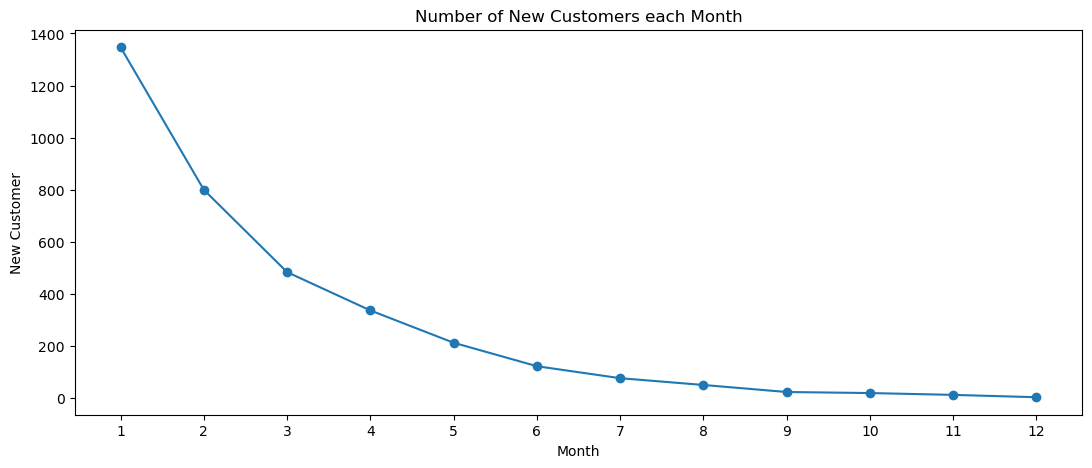

In [9]:
# Number of New Customer each Month
cohort_size_plot =  pd.DataFrame(cohort_size).reset_index()
cohort_size_plot.rename(columns={1:'new_customer'}, inplace = True)
cohort_size_plot['cohort_month'] = cohort_size_plot['cohort_month'].dt.month


plt.figure(figsize=(13, 5))
plt.plot(cohort_size_plot['cohort_month'],cohort_size_plot['new_customer'] , marker='o', linestyle='-')
plt.xticks(cohort_size_plot['cohort_month'])
plt.title('Number of New Customers each Month')
plt.xlabel('Month')
plt.ylabel('New Customer')
plt.grid(False)
plt.show()

## Insights
- Customers tend to return to make purchases after a **3-month cycle**.
- There is a significant increase in customer return purchases in October and November across most customer segments, possibly due to year-end promotional effectiveness.
- Customers in later cohorts show a better tendency to return, for example: **cohort 2017 - 05** with approximately **40%** returning within **the first 3 months**.
- However, the number of new customers in later cohorts has sharply declined, from **1347** in the January to fewer than **200** in the last **6 months** of the year.
## Recommendations
- Enhance customer retention campaigns in months following new customer acquisition, especially during periods of retention rate decline.
- Conduct detailed analysis to understand customer purchasing habits for tailored customer care programs.
- Develop campaigns to acquire new customers alongside nurturing existing ones.